In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon')
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
sns.set_context("paper", font_scale=1.5,)

In [2]:
data = pd.read_csv("data.csv", delimiter=";")
data

,id,route_length,decision points,condition,gender,age,how_often_use_gmaps,completion_time,errors,nasatlx,route_recall_turns,route_recall_directional_changes,Statement 1,Statement 2,Statement 3,Statement 4,Statement 5
0,1,1000,9,dot_navigation,Male,25,3,771,0,29.333333,100.000,100.0,Dot navigation was really easy to use for me.,"Because I can see an overview of the route, I ...","If there was a long, straight part of the rout...",I very much prefer dot navigation to turn-by-t...,If there was a unclear turn that I could hardl...
1,2,1050,9,dot_navigation,Male,28,4,768,0,33.666667,100.000,100.0,The experience (turn-by-turn navigation) was p...,I had to look down at my device all the time. ...,Never really had an overview of where I was go...,"If there was a straight part of the route, you...",I would use it (turn-by-turn navigation) in my...
2,3,1000,7,guided_navigation,Male,27,3,734,0,16.000000,85.700,85.7,The participant was familiar with the navigati...,The navigation method (guided navigation) impr...,The participant had no problems while navigati...,Most of the time the participant uses the dot ...,The participant would you the guided navigatio...
3,4,900,7,guided_navigation,Female,26,4,654,1,24.670000,100.000,100.0,She prefers dot navigation because with the gu...,The dot navigation is more intuitive,She did a mistake because she was confusing be...,She corrected herself when she made the mistak...,Road easy to follow as there is not much traff...
4,5,1060,8,dot_navigation,Male,25,4,726,0,34.670000,75.000,75.0,He's quite content about not making any errors...,The route was considered easy to follow due to...,"He thinks dot navigation is easier, because yo...",In the beginning he had some issues to orienta...,He has already been familiar with the surround...
5,6,1000,9,guided_navigation,Male,26,4,662,1,20.666667,100.000,100.0,"I was a little confused, sometimes the pointer...",When I use google map I usually use the dot na...,"I made a mistake, I followed a path that more...",I was looking too far ahead on the road and no...,I prefer spot navigation. So knowing where to ...
6,7,1000,8,dot_navigation,Male,25,4,652,0,25.670000,0.625,0.6,I usually hold my phone in my hands when navig...,"The GPS pointer jumped onto a building, so I t...",I really like and prefer the dot navigation ov...,I usually turn and move the map in my walking ...,I always use the dot navigation when I walk. H...
7,8,1000,9,guided_navigation,Male,22,4,666,0,31.333333,100.000,100.0,Route was manageable with navigation.,"Some issues with navigation method, GPS did no...",Do not like navigation because needed to hold ...,Navigation did not work in realtime because of...,"Would not use it, prefers dotted navigation fo..."
8,9,1001,9,guided_navigation,Male,23,4,737,1,15.330000,75.000,100.0,I'd say we were very lucky with the weather an...,"I use the guided navigation, and I found a bit...","Yeah, I mean since the weather is pretty cold ...","Yeah I think outside of the experiment, I woul...",I would use it [Guided Navigation] when I'm on...
9,10,950,7,dot_navigation,Male,25,4,866,1,22.330000,85.700,80.0,The participant stated that the starting point...,The participant stated that he was missing rem...,The participant stated that he already knew th...,The participant stated that he sometimes was d...,The participant would not use dot navigation w...


In [61]:
# Do the sentiment ananlysis
sentiments = []
for i in range(data.shape[0]): # iterate rows
    scores = []
    for j in range(1, 6): # iterate statements
        sid = SentimentIntensityAnalyzer()
        ss = sid.polarity_scores(data["Statement " + str(j)].iloc[i])
        scores.append(ss["compound"])
    sentiments.append(np.average(scores))
data["sentiment"] = sentiments

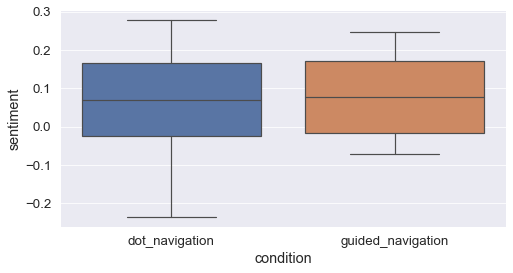

In [95]:
fig = sns.boxplot(x="condition", y="sentiment", data=data,showfliers = False)
#fig.get_figure().savefig("Test1.pdf")

In [75]:
data.groupby("condition")["sentiment"].mean()

condition
dot_navigation       0.053173
guided_navigation    0.032756
Name: sentiment, dtype: float64

In [76]:
data.groupby("condition")["sentiment"].median()

condition
dot_navigation       0.06807
guided_navigation    0.07758
Name: sentiment, dtype: float64

In [77]:
data.groupby("condition")["sentiment"].std()

condition
dot_navigation       0.150679
guided_navigation    0.194964
Name: sentiment, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


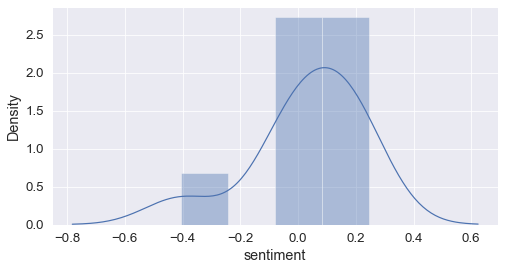

In [125]:
fig = sns.distplot(data[data["condition"] == "guided_navigation"]["sentiment"])
fig.get_figure().savefig("Guided_dist.pdf")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


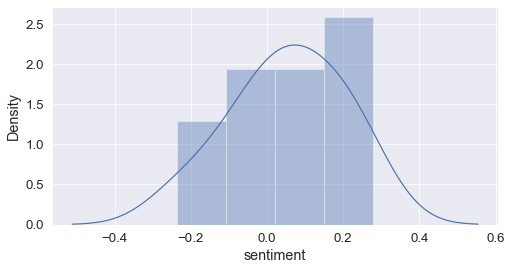

In [127]:
fig = sns.distplot(data[data["condition"] == "dot_navigation"]["sentiment"])
fig.get_figure().savefig("Dot_dist.pdf")

In [8]:
data["pace"] = data["completion_time"] / data["route_length"]

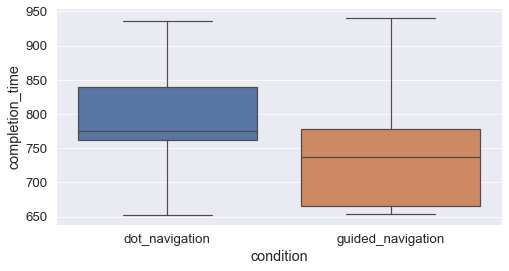

In [103]:
fig = sns.boxplot(x="condition", y="completion_time", data=data,showfliers = False)
fig.get_figure().savefig("CompletionTime.pdf")

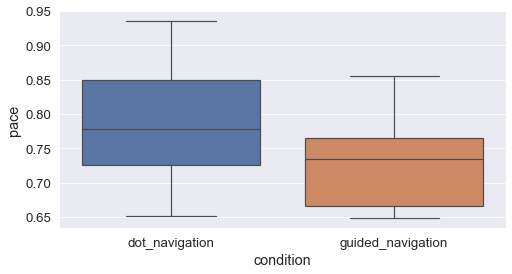

In [112]:
fig = sns.boxplot(x="condition", y="pace", data=data,showfliers = False)
fig.get_figure().savefig("CompletionTime.pdf")

In [119]:
data.groupby("condition")["pace"].median()

condition
dot_navigation       0.778105
guided_navigation    0.734000
Name: pace, dtype: float64

In [72]:
stats.kstest(data["pace"], 'halfnorm')

KstestResult(statistic=0.48323062099968794, pvalue=4.8978866910162076e-05)

In [80]:
stats.kstest(data["pace"], 'invgauss', args=[0.82])

KstestResult(statistic=0.5473325123462396, pvalue=1.9756428388104174e-06)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


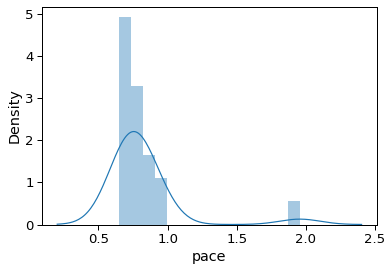

In [77]:
fig = sns.distplot(data["pace"])
#fig.get_figure().savefig("Pace_dist.pdf")

In [119]:
# Not useful, because asymmetrical number of samples
stats.wilcoxon(data[data["condition"] == "dot_navigation"]["pace"].iloc[0:9], data[data["condition"] == "guided_navigation"]["pace"])

WilcoxonResult(statistic=16.0, pvalue=0.49609375)